Jun 27-30

Continue of the work in Atlas-data.ipynb: find the matched galaxies in Harris and Atlas catalogs -> use the stellar mass from Atlas to find halo mass for galaxies in Harris catalog.

Here we use the petrosian radius to find whether the two galaxies match:

- Delete the overlaped galaxies inside Harris catalog (some of them have different number of GCs, I kept the ones that have larger number of GCs): two NGC4417, two VCC-1386, ESO-358-g01 vs IC1919;  

- Compare the two catalogs by source.match_to_catalog_sky(catalog);

- Compare the matched distances to the pestrosian radius of corresponding galaxies inside Atlas catalog;

- Confirm whether it is the same galaxy: if d2d <= pestrosian radius -> same galaxy!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits

path ='/home/ngoc/Downloads/GCs/'
path1 ='/home/ngoc/Downloads/GCs/code/'

In [2]:
from astropy.table import Table
from astropy.coordinates import Angle

In [3]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [4]:
data = pyfits.getdata(path+'nsa_v0_1_2.fits')
data_list = []
data_list.append(data)

In [5]:
# load the coordinates from Atlas
ra_Atlas  = data['RA']     #[degree]
dec_Atlas = data['DEC']    #[degree]
name_Atlas= data['IAUNAME']
#load the galaxy's stellar mass from Atlas
m_stellar = data['MASS']
r_pe      = data['PETROTHETA'] #petrosian radius of the galaxies [arcsec]

In [6]:
#load Harris 13 (RA, DEC) coordinates data 
ra_H  = np.loadtxt(path1+'GC_cat_H13.txt', usecols=(2)) #[hour]
dec_H = np.loadtxt(path1+'GC_cat_H13.txt', usecols=(3)) #[degree]
N_GC  = np.loadtxt(path1+'GC_cat_H13.txt', usecols=(13)) 

#convert [hour] -> [degree] for ra_H
ra_H  = Angle(ra_H, u.hour)
dec_H = Angle(dec_H, u.degree)

In [7]:
ra_H = ra_H.degree #convert RA from hour->degree

In [8]:
#check to find the overlapsed galaxies inside Harris catalog -> remove it by hand
for i in range(0,len(ra_H)):
    for j in range(i+1,len(ra_H)):
        if (i!= j and ra_H[i] == ra_H[j] and dec_H[i] == dec_H[j]):
            print(i, j , ra_H[i], ra_H[j], dec_H[i],dec_H[j])

In [9]:
#coordinates of Atlas catalog
c_Atlas = SkyCoord(ra=ra_Atlas*u.degree, dec=dec_Atlas*u.degree, frame='icrs')

In [10]:
#coordinates of Harris13 catalog
c_Harris = SkyCoord(ra=ra_H*u.degree, dec=dec_H, frame='icrs') #since ra_H now is the value->multiplied to unit

In [11]:
#source.match_to_catalog_sky(catalog)
idx, d2d, d3d = c_Harris.match_to_catalog_sky(c_Atlas)

In [12]:
d2d = d2d.arcsec #convert d2d to [arcsec], then take the value and remove the unit
#print(d2d)

In [13]:
i_count = len(idx)
print('total number of galaxies in Harris', i_count)
for i in range (0, len(idx)):
    if (d2d[i] > r_pe[i]):
        idx[i] = -1   #remotve the matches that larger than petrosian radius of galaxies
        i_count -= 1
print(idx)
print('total number of matched galaxies is', i_count)

total number of galaxies in Harris 418
[    -1 112939     -1     -1     -1 114192 114303 114305     -1     -1
     -1     -1 115241     -1 115775 116080 116190 116462     -1     -1
 116953     -1     -1     -1     -1     -1     -1     -1     -1     -1
 118591     -1 118810     -1     -1     -1     -1     -1 119413     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1  74602 138271     -1 121417     -1     -1
     -1 121562 121572 121653     -1   

In [67]:
for i in range(0,len(idx)):
    for j in range(i+1,len(idx)):
        if i!=j and idx[i] != -1 and idx[j] != -1 and idx[i] == idx[j]:
            print (i,j)

#=> the two look like they are going to merge

383 384


In [68]:
#take the stellar mass from Atlas catalog
N_GC_match      = np.zeros(i_count)
m_stellar_match = np.zeros(i_count)
ii = 0

for i in range (0, len(idx)):
    if (idx[i] != -1):
        N_GC_match[ii]      = N_GC[i]
        m_stellar_match[ii] = m_stellar[idx[i]]
        ii += 1

In [83]:
ra_H  = np.loadtxt(path1+'GC_cat_Harris13.txt', usecols=(2)) #[hour]
dec_H = np.loadtxt(path1+'GC_cat_Harris13.txt', usecols=(3)) #[degree]

ra_match     = np.zeros(i_count)
dec_match    = np.zeros(i_count)
id_match     = np.zeros(i_count)  #Harris ID of matching galaxies

ii = 0

for i in range (0, len(idx)):
    if (idx[i] != -1):
        ra_match[ii]  = ra_H[i]
        dec_match[ii] = dec_H[i]
        id_match[ii]  = i      #+1 since Fortran index start from 1, save the idx of gal in H catalog
        
        ii += 1

In [84]:
#the id of galaxies in Harris catalog which match to Atlas
for i in range(0,len(id_match)):
    print(id_match[i], ra_match[i],dec_match[i], np.log10(m_stellar_match[i]))#, name_Atlas[idx[i]])

1.0 0.0328381 -15.4609285 10.213769585182117
5.0 0.6493737 48.3373957 3.9168654798932687
6.0 0.6728045 41.6853789 9.593188603948612
7.0 0.7116069 40.8651653 10.480734616886606
12.0 0.9148683 -37.6844766 7.499682437291823
14.0 1.1235073 -69.8774177 10.453277546257377
15.0 1.3351857 3.4153385 10.984670994404336
16.0 1.41325 9.5387778 10.624365313952257
17.0 1.4289779 -1.3794906 10.570991382855267
20.0 1.6919139 -65.6159851 8.265048504280452
30.0 2.6771376 39.0575235 10.430611845670349
32.0 2.6958209 0.4431773 11.133537927374515
38.0 3.3043271 -66.4975862 10.873723942056989
124.0 7.9505994 14.3910145 11.087284146833579
125.0 8.2624655 58.3208441 7.876511629199096
127.0 8.6325556 -57.9738889 10.08497647196986
131.0 9.1441444 -9.62525 7.039172592228009
132.0 9.1937446 60.0372538 10.087936314662906
133.0 9.206775 35.0274167 11.14778613422666
139.0 9.909134 -28.2980459 10.303909977637147
140.0 9.9258686 69.0654379 9.159526345976879
145.0 10.134985 68.3992608 9.64098055412254
146.0 10.2114599 

In [71]:
#now follow Moster13 to find M_halo of the galaxies
from scipy.optimize import fsolve 

In [72]:
#Paramters adopted from Moster et al. 13, table 1
M_10     = 11.59
M_11     = 1.195
N_10     = 0.0351
N_11     = -0.0247
beta_10  = 1.376                #else:
                #    print(id_new[i]+1, M_V_new[i], 'is satellite of', id_new[cen]+1, M_V_new[cen])

beta_11  = -0.826
gamma_10 = 0.608
gamma_11 = 0.329

In [73]:
#calculate the parameters(z) for SHM relation
z = 0

log_M1 = M_10 + M_11*z/(z+1)
M_1    = 10**log_M1
NN     = N_10 + N_11*z/(z+1)
beta   = beta_10 + beta_11*z/(z+1)
gamma  = gamma_10 + gamma_11*z/(z+1)

print(np.log10(M_1),NN*2,beta,gamma)

11.59 0.0702 1.376 0.608


In [74]:
i = 0
M_guess = 1e10
M_h_array = np.zeros(i_count)

for m in m_stellar_match:
    func = lambda M_h : m - 2*NN*M_h/((M_h/M_1)**(-beta) + (M_h/M_1)**gamma)  
    M_h_array[i] = fsolve(func,M_guess)
    i += 1    
#print(M_h_array)

Text(0.5, 1.0, 'm_stellar(M_halo) compare to Fig.1 in Moster13')

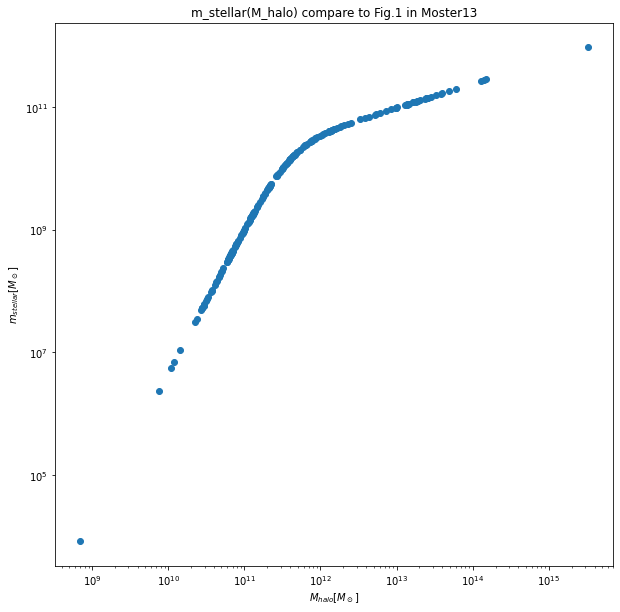

In [75]:
# compare the result to Harris catalog (all GCs)
plt.figure(figsize=[10,10])
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("$m_{stellar} [M_\odot]$")
ax.set_xlabel("$M_{halo} [M_\odot]$")    
ax.scatter( M_h_array,m_stellar_match)
ax.set_title('m_stellar(M_halo) compare to Fig.1 in Moster13')

In [76]:
#for only the NGC4377
m = 10**9.84  #taken from Lehmar 2020
func = lambda M_h : m - 2*NN*M_h/((M_h/M_1)**(-beta) + (M_h/M_1)**gamma)  
M_h_test = fsolve(func,1e10)

print(np.log10(M_h_test))
#M_h is different from one calculated by matching+Moster 

[11.40410493]


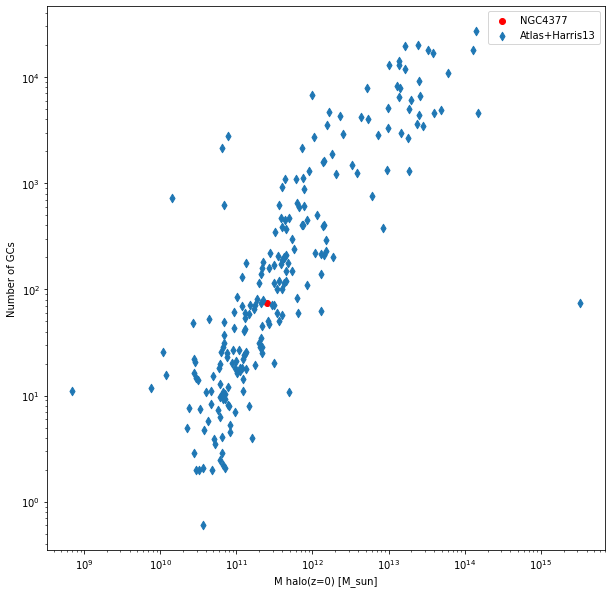

In [77]:
# compare the result to Harris catalog (all GCs)
plt.figure(figsize=[10,10])
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("M halo(z=0) [M_sun]")
ax.set_ylabel("Number of GCs")    
ax.scatter(M_h_test, N_GC_match[75], color='r', label ='NGC4377')
ax.scatter(M_h_array, N_GC_match, marker='d', label ='Atlas+Harris13')
ax.legend()

In [78]:
#found the most massive halo (>1e15 M_sun) but has N_GC ~ 100
for i in range(0,i_count):
    if (M_h_array[i] > 1e15 and N_GC_match[i]<200):
        print(i,', halo mass:' , M_h_array[i]/1e15,'*1e15 M_sun, number of GC:', N_GC_match[i])


75 , halo mass: 3.2523147318264884 *1e15 M_sun, number of GC: 74.0
